In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,8)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [7]:
img_size = 100
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/home/harish/M_Lens/Deepthi/deepthi_data/image_classification/data/train',target_size=(img_size, img_size),batch_size=batch_size,shuffle=True,class_mode='sparse')
test_generator = test_datagen.flow_from_directory('/home/harish/M_Lens/Deepthi/deepthi_data/image_classification/data/test',target_size=(img_size, img_size),batch_size=batch_size,shuffle=False,class_mode='sparse')

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [9]:
import os 

class_names_train = os.listdir('/home/harish/M_Lens/Deepthi/deepthi_data/image_classification/data/train')
print(class_names_train)

['apple_golden_1', 'cucumber_1', 'apple_rotten_1', 'apple_pink_lady_1', 'apple_golden_3', 'apple_golden_2', 'pear_1', 'cucumber_3', 'apple_granny_smith_1', 'cabbage_white_1', 'pear_3', 'apple_red_yellow_1', 'apple_6', 'zucchini_dark_1', 'apple_hit_1', 'apple_braeburn_1', 'apple_red_3', 'carrot_1', 'zucchini_1', 'apple_red_delicios_1', 'eggplant_violet_1', 'apple_red_1', 'apple_red_2', 'apple_crimson_snow_1']


In [10]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

le.fit(class_names_train)

class_labels_train = le.transform(class_names_train)

for i in range(len(class_names_train)):
    print(f"{class_names_train[i]} -> {class_labels_train[i]}")

apple_golden_1 -> 3
cucumber_1 -> 17
apple_rotten_1 -> 14
apple_pink_lady_1 -> 8
apple_golden_3 -> 5
apple_golden_2 -> 4
pear_1 -> 20
cucumber_3 -> 18
apple_granny_smith_1 -> 6
cabbage_white_1 -> 15
pear_3 -> 21
apple_red_yellow_1 -> 13
apple_6 -> 0
zucchini_dark_1 -> 23
apple_hit_1 -> 7
apple_braeburn_1 -> 1
apple_red_3 -> 11
carrot_1 -> 16
zucchini_1 -> 22
apple_red_delicios_1 -> 12
eggplant_violet_1 -> 19
apple_red_1 -> 9
apple_red_2 -> 10
apple_crimson_snow_1 -> 2


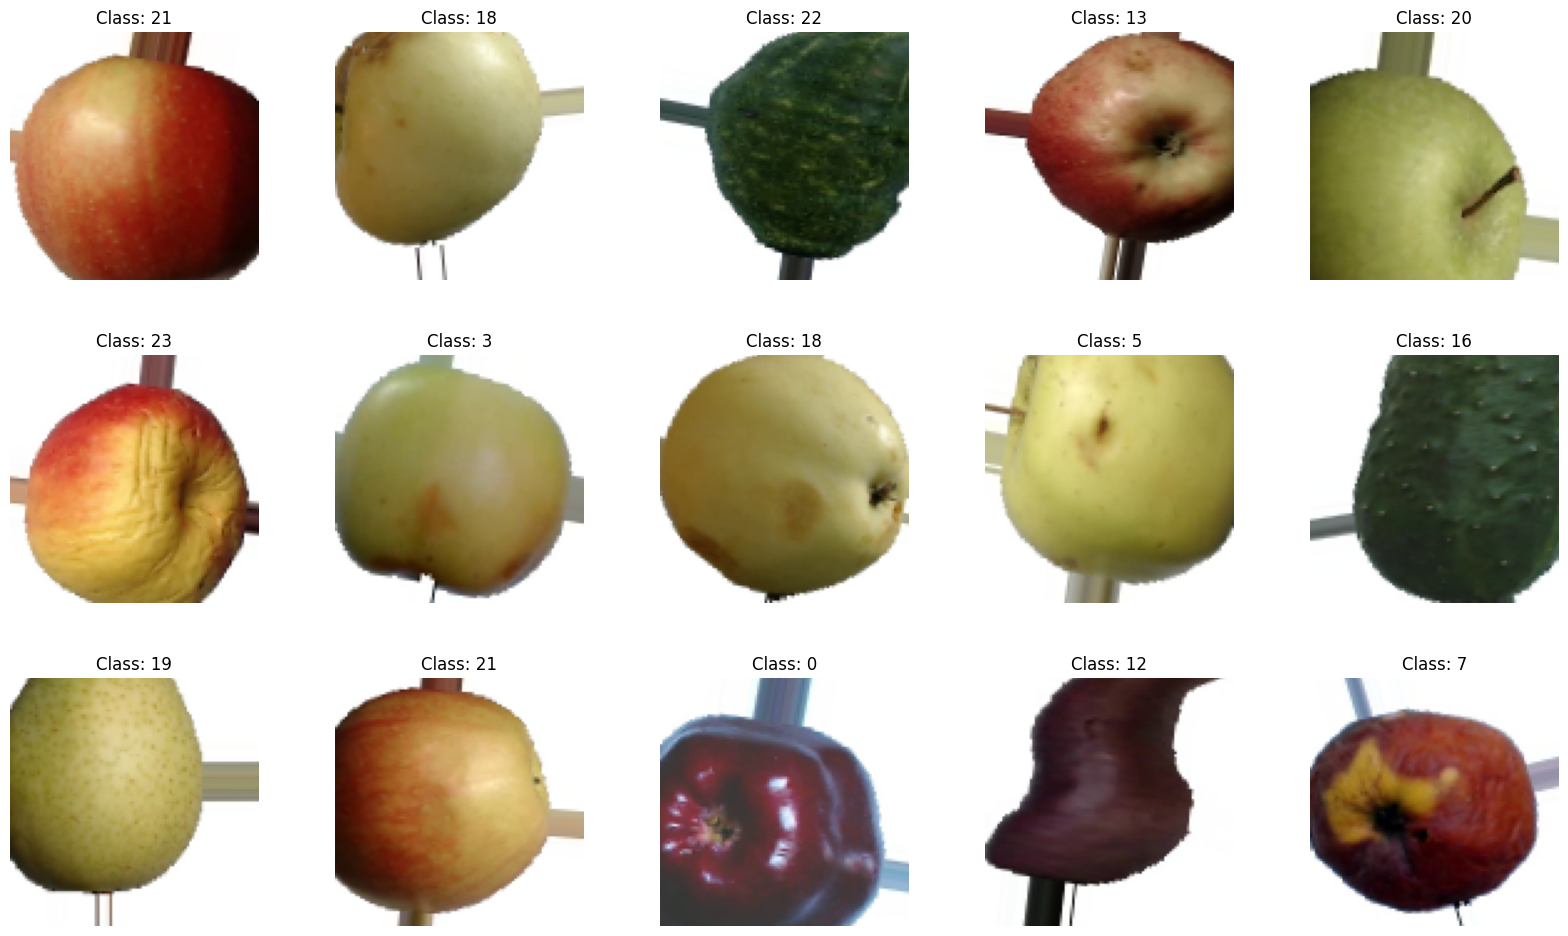

In [11]:
samples = train_generator.__next__() 

images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {class_labels_train[int(target[i])]}")
    plt.axis('off')

In [13]:
class_names_test = os.listdir('/home/harish/M_Lens/Deepthi/deepthi_data/image_classification/data/test')
print(class_names_test)

['apple_golden_1', 'cucumber_1', 'apple_rotten_1', 'apple_pink_lady_1', 'apple_golden_3', 'apple_golden_2', 'pear_1', 'cucumber_3', 'apple_granny_smith_1', 'cabbage_white_1', 'pear_3', 'apple_red_yellow_1', 'apple_6', 'zucchini_dark_1', 'apple_hit_1', 'apple_braeburn_1', 'apple_red_3', 'carrot_1', 'zucchini_1', 'apple_red_delicios_1', 'eggplant_violet_1', 'apple_red_1', 'apple_red_2', 'apple_crimson_snow_1']


In [14]:
le = LabelEncoder()

le.fit(class_names_test)

class_labels_test = le.transform(class_names_test)

for i in range(len(class_names_test)):
    print(f"{class_names_test[i]} -> {class_labels_test[i]}")

apple_golden_1 -> 3
cucumber_1 -> 17
apple_rotten_1 -> 14
apple_pink_lady_1 -> 8
apple_golden_3 -> 5
apple_golden_2 -> 4
pear_1 -> 20
cucumber_3 -> 18
apple_granny_smith_1 -> 6
cabbage_white_1 -> 15
pear_3 -> 21
apple_red_yellow_1 -> 13
apple_6 -> 0
zucchini_dark_1 -> 23
apple_hit_1 -> 7
apple_braeburn_1 -> 1
apple_red_3 -> 11
carrot_1 -> 16
zucchini_1 -> 22
apple_red_delicios_1 -> 12
eggplant_violet_1 -> 19
apple_red_1 -> 9
apple_red_2 -> 10
apple_crimson_snow_1 -> 2


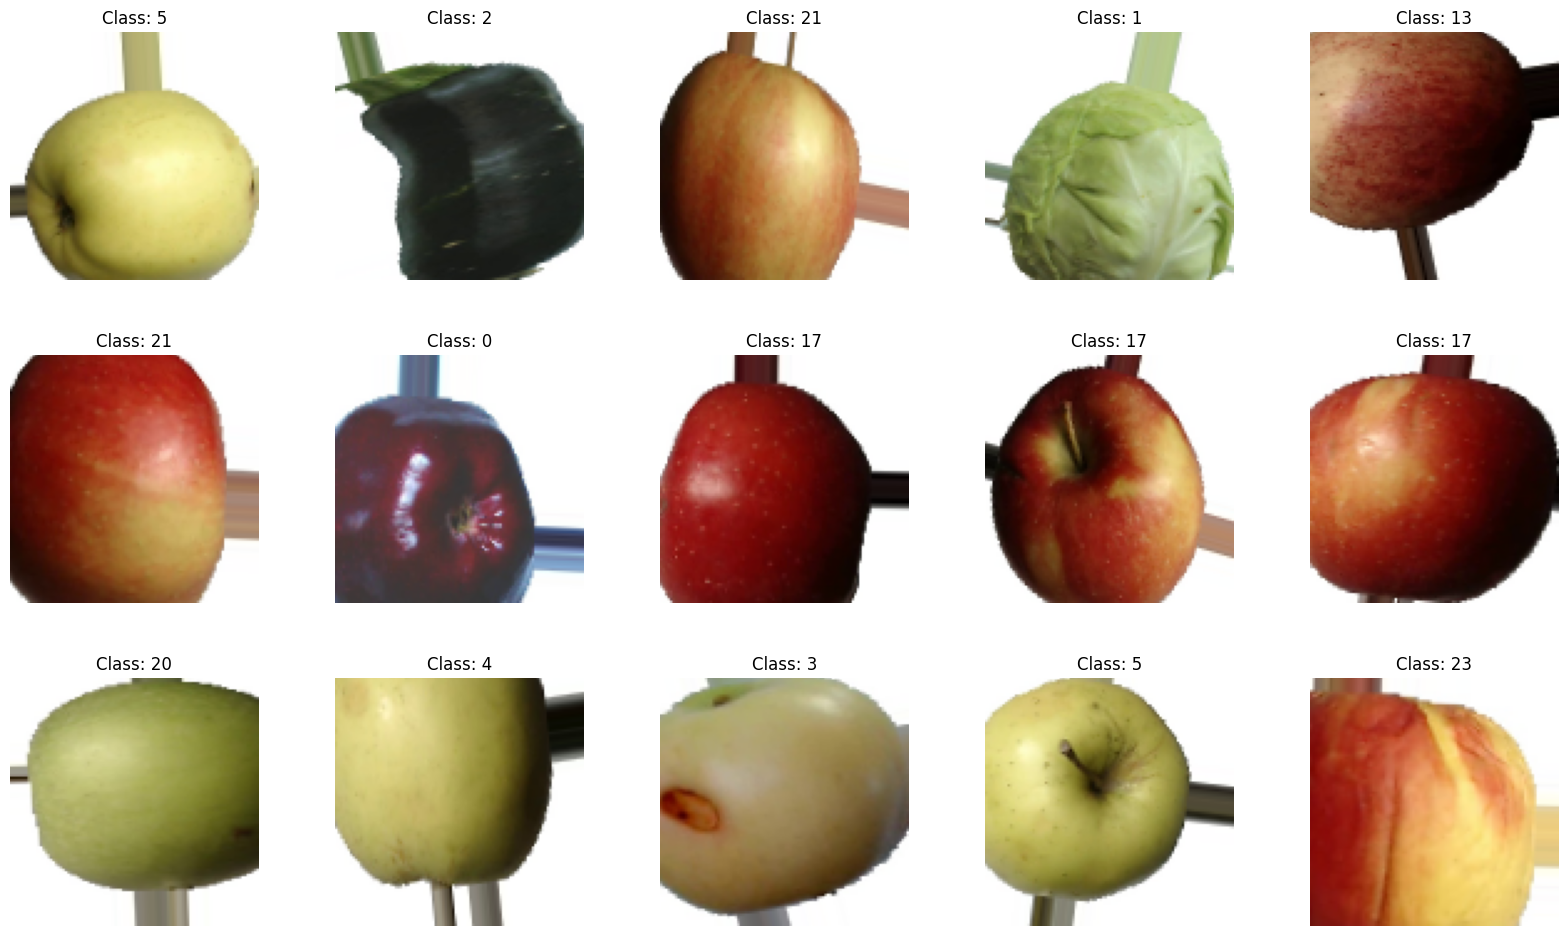

In [15]:
samples = train_generator.__next__() 

images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {class_labels_test[int(target[i])]}")
    plt.axis('off')

In [16]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(131, activation = 'softmax'))


model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 128)     

In [17]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10) 

Epoch 1/10


2023-03-28 15:53:09.713880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


195/195 [==============================] - ETA: 0s - loss: 2.3344 - accuracy: 0.2781

2023-03-28 15:54:10.100599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


195/195 [==============================] - 66s 335ms/step - loss: 2.3344 - accuracy: 0.2781 - val_loss: 0.7839 - val_accuracy: 0.6785
Epoch 2/10
195/195 [==============================] - 65s 334ms/step - loss: 0.8047 - accuracy: 0.7065 - val_loss: 0.4955 - val_accuracy: 0.8395
Epoch 3/10
195/195 [==============================] - 64s 328ms/step - loss: 0.4285 - accuracy: 0.8475 - val_loss: 0.2177 - val_accuracy: 0.9267
Epoch 4/10
195/195 [==============================] - 64s 327ms/step - loss: 0.3060 - accuracy: 0.8891 - val_loss: 0.1877 - val_accuracy: 0.9260
Epoch 5/10
195/195 [==============================] - 64s 326ms/step - loss: 0.2127 - accuracy: 0.9222 - val_loss: 0.0259 - val_accuracy: 0.9929
Epoch 6/10
195/195 [==============================] - 64s 326ms/step - loss: 0.1692 - accuracy: 0.9408 - val_loss: 0.0293 - val_accuracy: 0.9894
Epoch 7/10
195/195 [==============================] - 64s 326ms/step - loss: 0.1452 - accuracy: 0.9470 - val_loss: 0.0508 - val_accuracy: 0.9

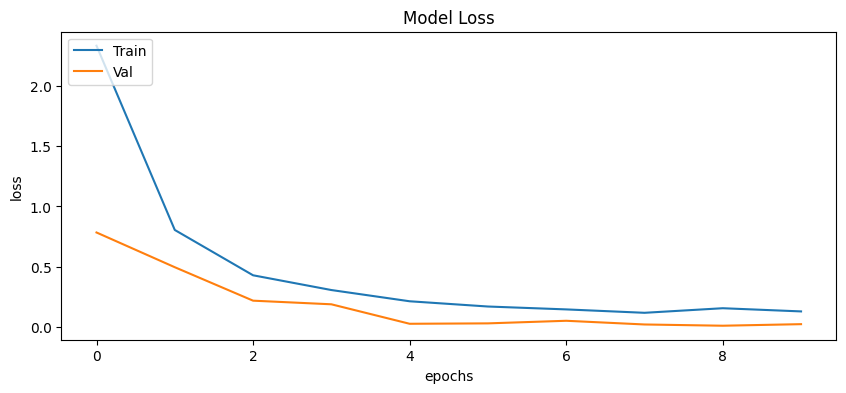

In [18]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

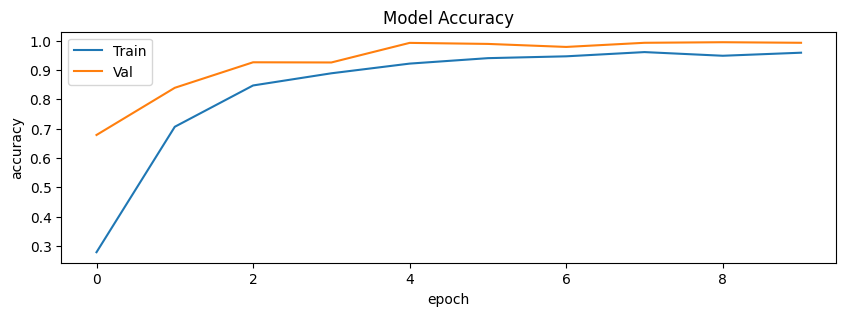

In [19]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
classes = test_generator.classes
y_pred = model.predict(test_generator)
score = tf.nn.softmax(y_pred)

 2/98 [..............................] - ETA: 5s 

2023-03-28 16:04:41.525654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


98/98 [==============================] - 6s 59ms/step


In [21]:
score

<tf.Tensor: shape=(3110, 131), dtype=float32, numpy=
array([[0.02047371, 0.00753479, 0.00753479, ..., 0.00753479, 0.00753479,
        0.00753479],
       [0.02047258, 0.0075348 , 0.0075348 , ..., 0.0075348 , 0.0075348 ,
        0.0075348 ],
       [0.02047611, 0.00753478, 0.00753478, ..., 0.00753478, 0.00753478,
        0.00753478],
       ...,
       [0.00753476, 0.00753476, 0.00753476, ..., 0.00753476, 0.00753476,
        0.00753476],
       [0.00753476, 0.00753476, 0.00753476, ..., 0.00753476, 0.00753476,
        0.00753476],
       [0.00753476, 0.00753476, 0.00753476, ..., 0.00753476, 0.00753476,
        0.00753476]], dtype=float32)>

In [23]:
result = model.evaluate(test_generator)


 3/98 [..............................] - ETA: 4s - loss: 8.5487e-04 - accuracy: 1.0000

2023-03-28 16:05:08.692761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


98/98 [==============================] - 6s 58ms/step - loss: 0.0227 - accuracy: 0.9932


In [24]:
print(result)

[0.022717658430337906, 0.9932475686073303]
